# Unit‑Root Tests, Mean‑Reversion & Stochastic‑Process Toolkit  
**Author:** Michael Childress &nbsp;&nbsp; **Updated:** {{date}}

This notebook revisits stationarity concepts and applies them to real equities (TSLA & EQNR).  
We follow the same section pattern as earlier notebooks.

## 1&nbsp;&nbsp;Small Recap  
- Trend / seasonality / random noise  
- Additive vs multiplicative models  
- Why we need stationarity for ARIMA‑type models

In [1]:
# 2  Imports & helpers
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape

plt.style.use("seaborn-v0_8")

def hurst(ts):
    lags = range(2, 100)
    tau  = [np.var(ts[lag:] - ts[:-lag]) for lag in lags]
    return np.polyfit(np.log(lags), np.log(tau), 1)[0] / 2.0

def adf_report(series, name, reg='c'):
    """Print a compact ADF summary."""
    stat, p, _, _, crit, _ = adfuller(series.dropna(), regression=reg)
    print(f"{name}:  ADF={stat:6.3f}  p={p:5.3f}  |  1%:{crit['1%']:.2f}  5%:{crit['5%']:.2f}")

In [2]:
# 3  Load 1-minute BNB/USDT data from local CSV
data_path = "/Users/mchildress/Active Code/ts_basics/data/bnbusdt_1m.csv"
df = pd.read_csv(data_path, parse_dates=['timestamp'], index_col='timestamp')
df.sort_index(inplace=True)
# For our analysis, we'll focus on the 'close' column
series = df['close']
series.head()

/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_37938/2211089046.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(data_path, parse_dates=['timestamp'], index_col='timestamp')


timestamp
1514764800    8.5300
1514764860    8.5300
1514764920    8.5145
1514764980    8.4848
1514765040    8.5066
Name: close, dtype: float64

**We** fetched ~756 trading‑day closes for each stock; a first glance follows.

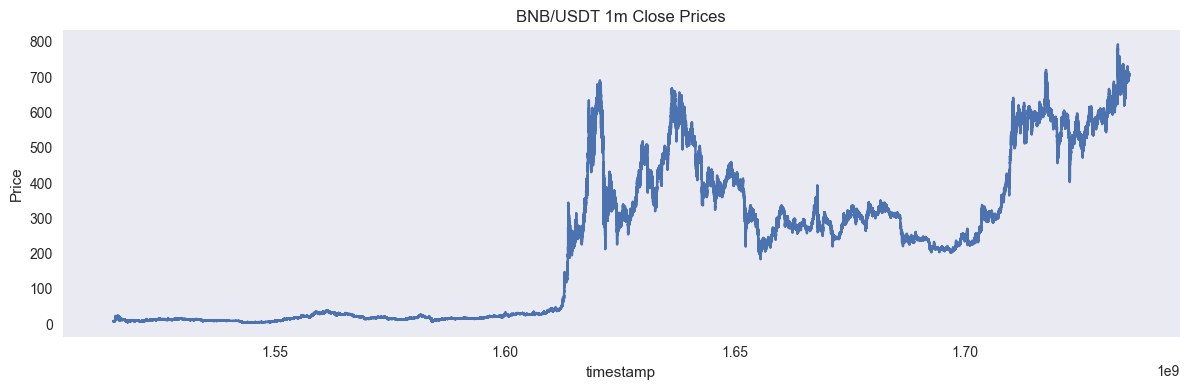

In [3]:
# 4  Run‑sequence plot
fig, ax = plt.subplots(figsize=(12,4))
series.plot(ax=ax, title="BNB/USDT 1m Close Prices")
ax.set_ylabel("Price")
ax.grid()
plt.tight_layout()